# Network Slicing
This project aims to create a model that can preform network slicing based on various metrics and industries associated with users. This dataset was provided by https://www.kaggle.com/datasets/gauravduttakiit/network-slicing-recognition/code. 

Network slicing refers to the virtualization of resources, such as bandwidth, computing power, and storage, to create isolated virtual networks existing on shared physical infrastructure. This concept has been widely adopted in 5G NR, and is used to guarantee different QoS to customers. Applying ML for slice recognition enables more efficient and adaptive management of slices, leading to improved performance, reliability, and customer experience. In this project, the goal is to understand what factors contribute most to slice assignment for customers in a 5G NR network. Although there are no labels on the testing data, statistical inference can be applied to match results with the training data.

In [1]:
# Import libraries
import numpy as np
import pandas as pd

## Data Preparation & Pre-Processing

In [2]:
# Load training and testing data as pandas dataframes
train_df = pd.read_csv(filepath_or_buffer='train_dataset.csv')
test_df = pd.read_csv(filepath_or_buffer='test_dataset.csv')

In [3]:
print(f"train dataset size : {train_df.shape}\n test dataset size : {test_df.shape}")

train dataset size : (31583, 17)
 test dataset size : (31584, 16)


There is one feature that is not in the testing data, so let's see what it is. 

In [4]:
print(f"Features missing from test dataset: {set(train_df.columns) - set(test_df.columns)}")

Features missing from test dataset: {'slice Type'}


The testing data does not report the assigned slice type for each user. Therefore, we will need to look at the statistics of the training data and try to match this (i.e., guarantee a similar QoS).

In [5]:
train_df.head(10)

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,14,0,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0,3
1,18,20,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0,1
2,17,14,0.000001,300,0,1,0,1,0,0,0,0,0,0,0,1,1
3,3,17,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,1
4,9,4,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2
5,19,2,0.000001,10,1,0,0,1,0,0,1,0,0,0,0,0,3
6,15,2,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0,2
7,19,3,0.001000,50,0,1,0,1,1,0,0,0,0,0,0,0,1
8,8,20,0.001000,150,0,1,0,1,0,0,0,0,0,0,0,1,1
9,13,10,0.001000,150,0,1,0,1,0,0,0,0,0,0,0,1,1


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31583 entries, 0 to 31582
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LTE/5g Category       31583 non-null  int64  
 1   Time                  31583 non-null  int64  
 2   Packet Loss Rate      31583 non-null  float64
 3   Packet delay          31583 non-null  int64  
 4   IoT                   31583 non-null  int64  
 5   LTE/5G                31583 non-null  int64  
 6   GBR                   31583 non-null  int64  
 7   Non-GBR               31583 non-null  int64  
 8   AR/VR/Gaming          31583 non-null  int64  
 9   Healthcare            31583 non-null  int64  
 10  Industry 4.0          31583 non-null  int64  
 11  IoT Devices           31583 non-null  int64  
 12  Public Safety         31583 non-null  int64  
 13  Smart City & Home     31583 non-null  int64  
 14  Smart Transportation  31583 non-null  int64  
 15  Smartphone         

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31584 entries, 0 to 31583
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LTE/5g Category       31584 non-null  int64  
 1   Time                  31584 non-null  int64  
 2   Packet Loss Rate      31584 non-null  float64
 3   Packet delay          31584 non-null  int64  
 4   IoT                   31584 non-null  int64  
 5   LTE/5G                31584 non-null  int64  
 6   GBR                   31584 non-null  int64  
 7   Non-GBR               31584 non-null  int64  
 8   AR/VR/Gaming          31584 non-null  int64  
 9   Healthcare            31584 non-null  int64  
 10  Industry 4.0          31584 non-null  int64  
 11  IoT Devices           31584 non-null  int64  
 12  Public Safety         31584 non-null  int64  
 13  Smart City & Home     31584 non-null  int64  
 14  Smart Transportation  31584 non-null  int64  
 15  Smartphone         

In [8]:
print(f"Number of NULL values per feature \n")
print(f"Train \n {train_df.isna().sum()} \n")
print(f"Test \n {test_df.isna().sum()}")


Number of NULL values per feature 

Train 
 LTE/5g Category         0
Time                    0
Packet Loss Rate        0
Packet delay            0
IoT                     0
LTE/5G                  0
GBR                     0
Non-GBR                 0
AR/VR/Gaming            0
Healthcare              0
Industry 4.0            0
IoT Devices             0
Public Safety           0
Smart City & Home       0
Smart Transportation    0
Smartphone              0
slice Type              0
dtype: int64 

Test 
 LTE/5g Category         0
Time                    0
Packet Loss Rate        0
Packet delay            0
IoT                     0
LTE/5G                  0
GBR                     0
Non-GBR                 0
AR/VR/Gaming            0
Healthcare              0
Industry 4.0            0
IoT Devices             0
Public Safety           0
Smart City & Home       0
Smart Transportation    0
Smartphone              0
dtype: int64


From the above, we see that there are no null values in either the test or train datasets. Therefore, we don't need to remove any datapoints. 

## Exploratory Data Analysis (EDA)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

 #### Plot the distribution of LTE/5G category and slice type.

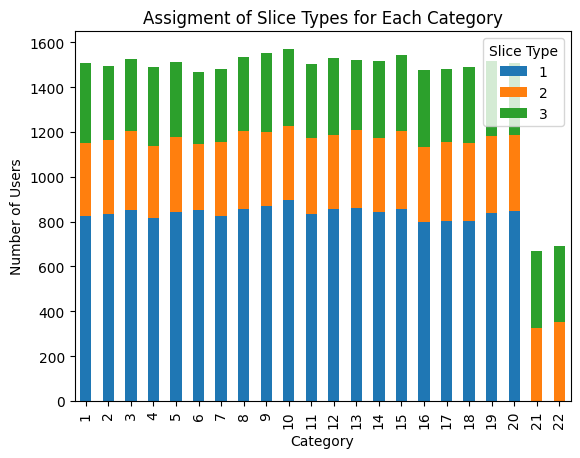

In [10]:
count_cat = train_df.groupby('LTE/5g Category')['slice Type'].value_counts(normalize=False).unstack()
prob_cat = train_df.groupby('LTE/5g Category')['slice Type'].value_counts(normalize=True).unstack()

# Plotting
count_cat.plot(kind='bar', stacked=True)
plt.xlabel('Category')
plt.ylabel('Number of Users')
plt.title('Assigment of Slice Types for Each Category')
plt.legend(title='Slice Type')
plt.show()

In [11]:
# Print probabilities table
print("Number of Users per Slice Types for Each Category:")
print(count_cat)

Number of Users per Slice Types for Each Category:
slice Type           1      2      3
LTE/5g Category                     
1                824.0  326.0  359.0
2                832.0  332.0  328.0
3                851.0  353.0  321.0
4                815.0  323.0  350.0
5                842.0  337.0  334.0
6                850.0  296.0  323.0
7                824.0  330.0  326.0
8                855.0  348.0  332.0
9                869.0  329.0  356.0
10               896.0  332.0  342.0
11               835.0  339.0  330.0
12               856.0  329.0  346.0
13               860.0  349.0  314.0
14               843.0  330.0  345.0
15               855.0  348.0  339.0
16               798.0  333.0  347.0
17               803.0  353.0  326.0
18               804.0  348.0  336.0
19               839.0  342.0  335.0
20               848.0  338.0  322.0
21                 NaN  324.0  343.0
22                 NaN  353.0  338.0


From the above, we see that slice 3 will never be assigned for categories 21 and 22. 

Let's explore what these two categories could represent to better understand how network slicing may work. 

In [12]:
# Get a list of all categories
categories = sorted(train_df['LTE/5g Category'].unique())

In [13]:
# Initialize an empty list to store the names of one-hot encoded features
one_hot_features = []

# Iterate over the columns of the dataframe
for column in train_df.columns:
    # Check if the column contains only 0s and 1s
    if set(train_df[column].unique()) == {0, 1}:
        # If so, add the column name to the list of one-hot encoded features
        one_hot_features.append(column)

# Print the list of one-hot encoded features
print("One-hot encoded features:", one_hot_features)

One-hot encoded features: ['IoT', 'LTE/5G', 'GBR', 'Non-GBR', 'AR/VR/Gaming', 'Healthcare', 'Industry 4.0', 'IoT Devices', 'Public Safety', 'Smart City & Home', 'Smart Transportation', 'Smartphone']


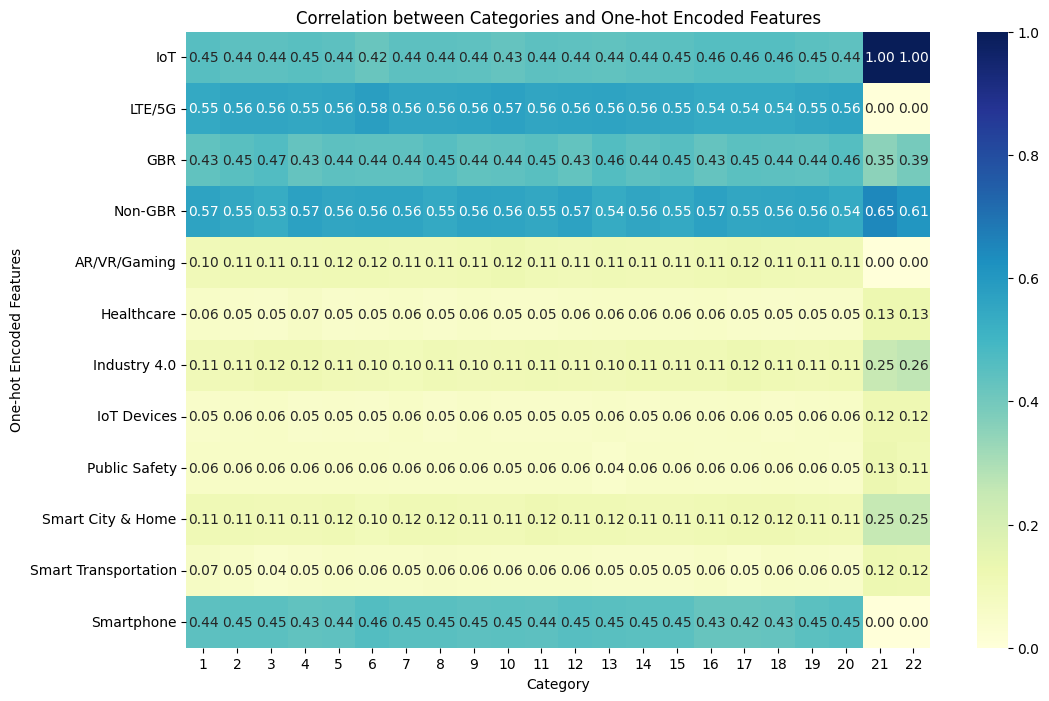

In [14]:
# Initialize dictionary to store probabilities
category_features_prob = {}

# Iterate over each category
for category in categories:
    # Subset the dataframe for the current category
    subset_df = train_df[train_df['LTE/5g Category'] == category]

    # Only look at the one hot sub-set of features 
    subset_df = subset_df[one_hot_features]

    # Calculate the % of times each feature is a 1 and save this
    feature_prob = subset_df.mean()  # Calculate mean to get the probability
    category_features_prob[category] = feature_prob

# Convert the dictionary to a DataFrame
category_features_df = pd.DataFrame(category_features_prob)

# Plot the correlation between each category and the one-hot encoded features
plt.figure(figsize=(12, 8))
sns.heatmap(category_features_df, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation between Categories and One-hot Encoded Features')
plt.xlabel('Category')
plt.ylabel('One-hot Encoded Features')
plt.show()

From the above, it is each to see that categories 1-20 have roughly equal asignments of users. Categories 21 and 22 are NEVER used for LTE/5G, Gaming, and Smartphone and are always used for IoT. I assume that this will be easy to predict. 

This plot shows us that cateogires 1 through 20 aim to have a distribution of 56%, 22%, and 22% for the three slice types respectivly. In caterogies 21 and 22, this distribution changes to 0%, 50%, 50%. 

Now, let's see the overall distribution of slice allocations by category. 

In [15]:
# Separate categories into two groups: 1-20 and 21-22
train_1_to_20 = count_cat.loc[1:20].mean().fillna(0)
train_1_to_20 = train_1_to_20/sum(train_1_to_20)
train_21_to_22 = count_cat.loc[21:22].mean().fillna(0)
train_21_to_22 = train_21_to_22/sum(train_21_to_22)

# Print average probabilities for each group
print("Average Probabilities for Categories 1 through 20:")
print(train_1_to_20)
print("\nAverage Probabilities for Categories 21 and 22:")
print(train_21_to_22)

Average Probabilities for Categories 1 through 20:
slice Type
1    0.555798
2    0.222167
3    0.222035
dtype: float64

Average Probabilities for Categories 21 and 22:
slice Type
1    0.000000
2    0.498527
3    0.501473
dtype: float64


This is very interesting. This shows that in each category, the number of type 2 and 3 slices is equal. In the first 20 categories, the number of slice 1 types is also equal. 

We explored all of the one-hot features and now we could explore the other features. 

In [16]:
print(train_df["Time"].describe())

count    31583.000000
mean        11.476459
std          6.915643
min          0.000000
25%          6.000000
50%         11.000000
75%         17.000000
max         23.000000
Name: Time, dtype: float64


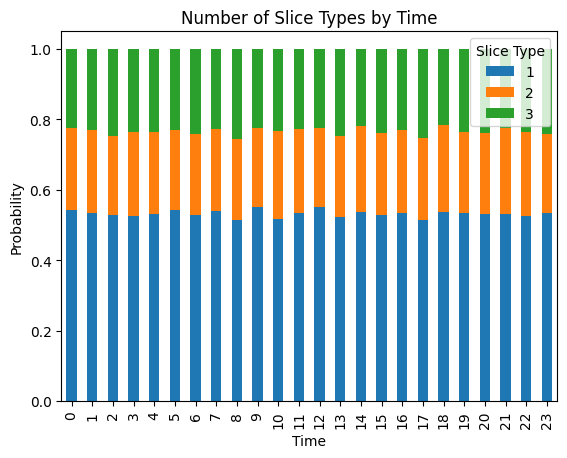

In [17]:
slice_time = train_df.groupby('Time')['slice Type'].value_counts(normalize=True).unstack()

# Plotting
slice_time.plot(kind='bar', stacked=True)
plt.xlabel('Time')
plt.ylabel('Probability')
plt.title('Number of Slice Types by Time')
plt.legend(title='Slice Type')
plt.show()

Time seems to be an irrelevant feature across the slice types, therefore, we could remove it.

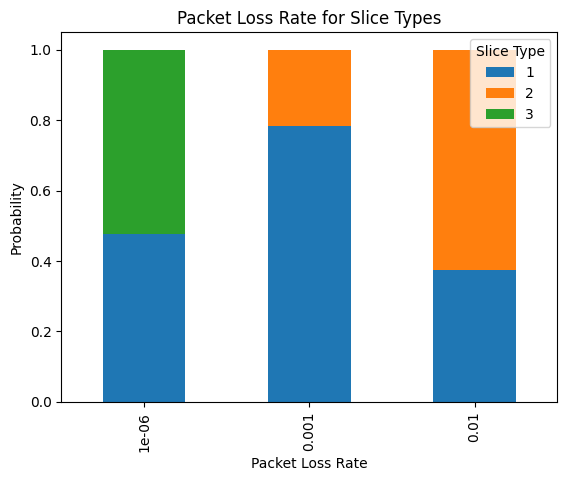

In [18]:
slice_loss = train_df.groupby('Packet Loss Rate')['slice Type'].value_counts(normalize=True).unstack()

# Plotting
slice_loss.plot(kind='bar', stacked=True)
plt.xlabel('Packet Loss Rate')
plt.ylabel('Probability')
plt.title('Packet Loss Rate for Slice Types')
plt.legend(title='Slice Type')
plt.show()

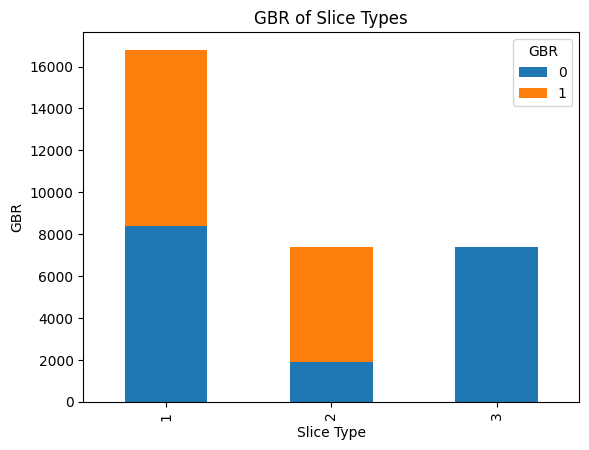

In [19]:
probabilities = train_df.groupby('slice Type')['GBR'].value_counts(normalize=False).unstack()

# Plotting
probabilities.plot(kind='bar', stacked=True)
plt.ylabel('GBR')
plt.xlabel('Slice Type')
plt.title('GBR of Slice Types')
plt.legend(title='GBR')
plt.show()

In [20]:
GBR_slice_category = train_df.groupby(['LTE/5g Category', 'slice Type'])['GBR'].apply(lambda x: (x == 1).mean()).unstack()


In [21]:
print(GBR_slice_category)

slice Type              1         2    3
LTE/5g Category                         
1                0.497573  0.751534  0.0
2                0.513221  0.743976  0.0
3                0.520564  0.764873  0.0
4                0.493252  0.718266  0.0
5                0.498812  0.735905  0.0
6                0.496471  0.763514  0.0
7                0.493932  0.733333  0.0
8                0.516959  0.732759  0.0
9                0.493671  0.750760  0.0
10               0.498884  0.731928  0.0
11               0.513772  0.734513  0.0
12               0.488318  0.732523  0.0
13               0.510465  0.756447  0.0
14               0.501779  0.751515  0.0
15               0.502924  0.772989  0.0
16               0.484962  0.738739  0.0
17               0.505604  0.733711  0.0
18               0.487562  0.775862  0.0
19               0.491061  0.736842  0.0
20               0.515330  0.748521  0.0
21                    NaN  0.728395  0.0
22                    NaN  0.764873  0.0


In [22]:
# Separate categories into two groups: 1-20 and 21-22
categories_1_to_20 = GBR_slice_category.loc[1:20].mean()
categories_21_to_22 = GBR_slice_category.loc[21:22].mean()

# Print average probabilities for each group
print("Average Probabilities for Categories 1 through 20:")
print(categories_1_to_20)
print("\nAverage Probabilities for Categories 21 and 22:")
print(categories_21_to_22)

Average Probabilities for Categories 1 through 20:
slice Type
1    0.501256
2    0.745425
3    0.000000
dtype: float64

Average Probabilities for Categories 21 and 22:
slice Type
1         NaN
2    0.746634
3    0.000000
dtype: float64


Slice 2 has 75% GBR for slice 2 and 0% GBR for slice 3 across all categories. Slice 1 has 50% GBR for slice 1 for the first 20 categories. 

## Feature Extraction

A correlation matrix is a helpful tool for looking at features and their interactions. 

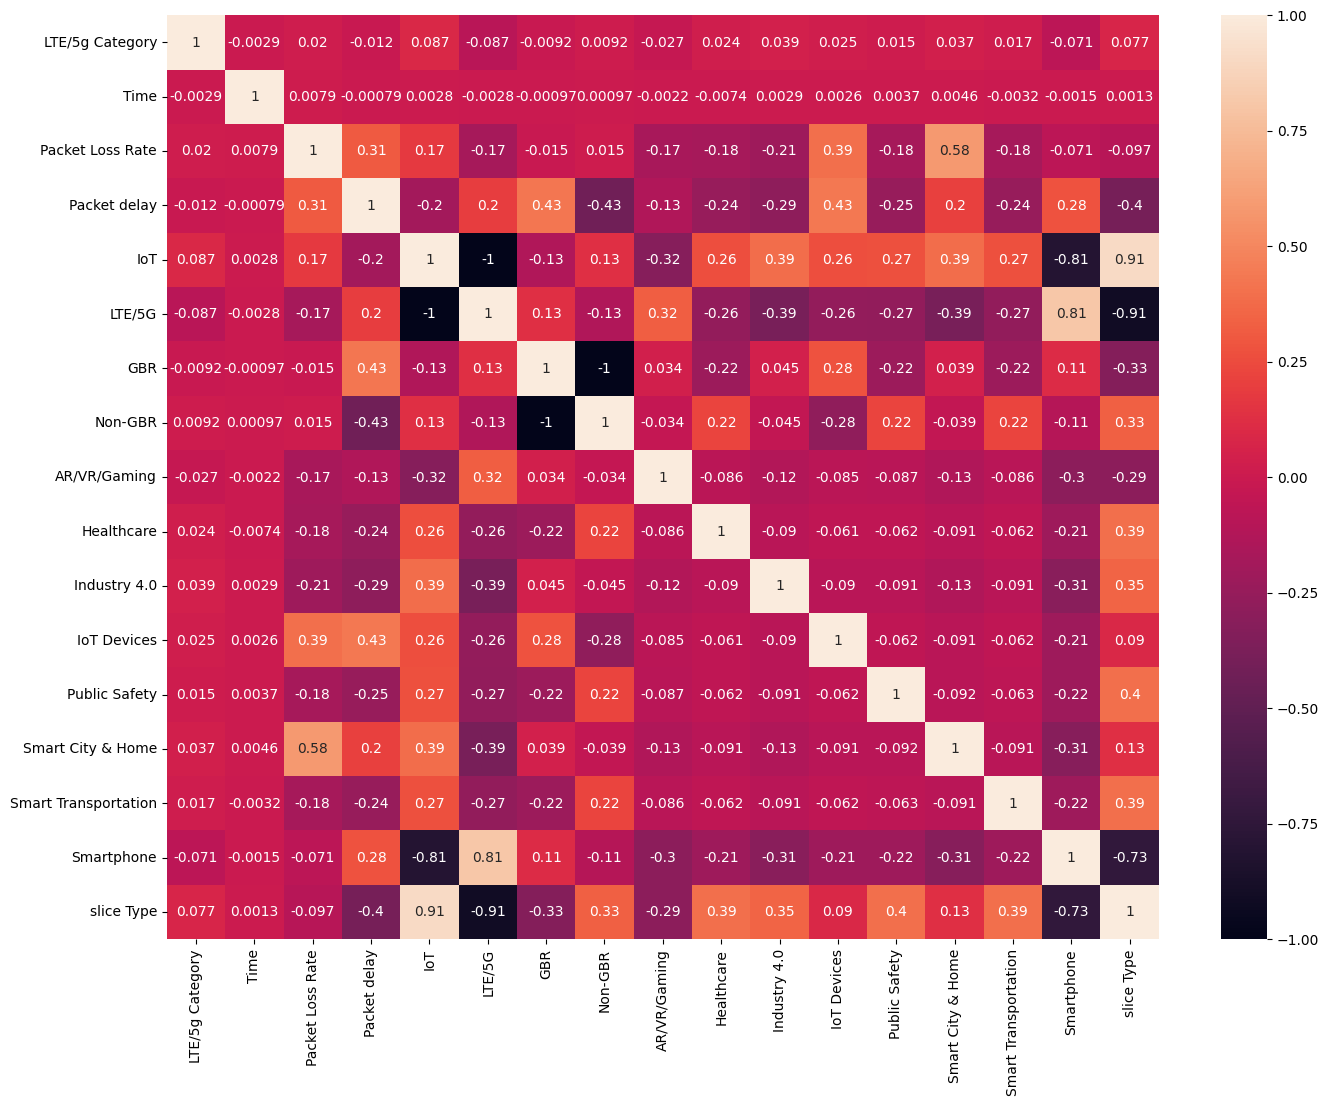

In [23]:
corr_results = train_df.corr()
fig = plt.figure(figsize = (16,12))

sns.heatmap(corr_results,annot = True)
plt.show()

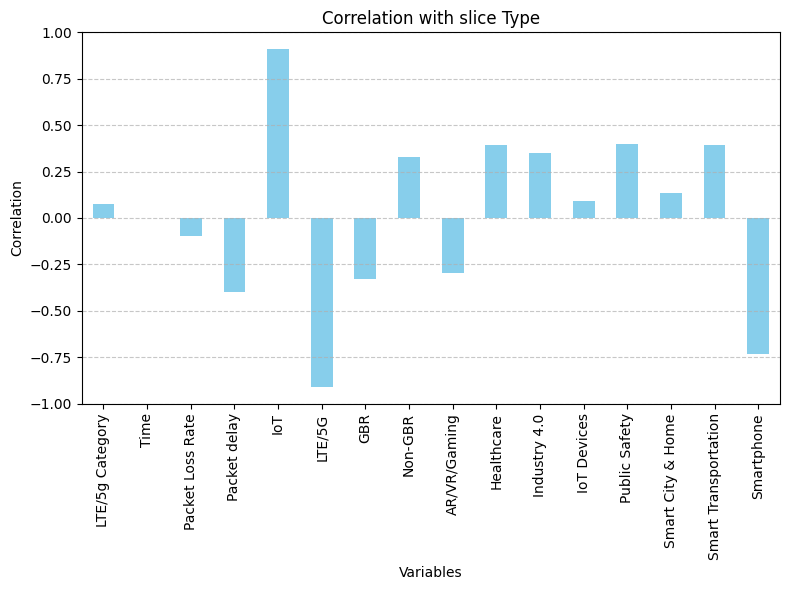

In [24]:
correlations = train_df.corr()['slice Type'].drop('slice Type')

# Plot the correlations
plt.figure(figsize=(8, 6))
correlations.plot(kind='bar', color='skyblue')
plt.title('Correlation with {}'.format('slice Type'))
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [25]:
print(abs(correlations).sort_values())

Time                    0.001263
LTE/5g Category         0.076893
IoT Devices             0.089709
Packet Loss Rate        0.097135
Smart City & Home       0.132207
AR/VR/Gaming            0.294246
Non-GBR                 0.331008
GBR                     0.331008
Industry 4.0            0.349881
Healthcare              0.391124
Smart Transportation    0.393952
Packet delay            0.396959
Public Safety           0.397438
Smartphone              0.734449
IoT                     0.909506
LTE/5G                  0.909506
Name: slice Type, dtype: float64


### Decisions 
    1. Remove the time feature due to very little correlation. 
    2. Remove Non-GBR, because this is the inverse of GBR. 
    3. Remove IoT feature, because LTE/5G is the inverse. 

In [26]:
train_df.drop(columns = ["Time","Non-GBR","IoT"],inplace = True)
test_df.drop(columns = ["Time","Non-GBR","IoT"],inplace = True)

## Machine Learning Models

In [27]:
import math
import sklearn
import re

In [35]:
# Clean up the labels to ensure that the ML models don't have issues.
train_df = train_df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
test_df = test_df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

train_df.head()

,LTE5gCategory,PacketLossRate,Packetdelay,LTE5G,GBR,ARVRGaming,Healthcare,Industry40,IoTDevices,PublicSafety,SmartCityHome,SmartTransportation,Smartphone,sliceType
0,14,0.000001,10,0,0,0,0,0,0,1,0,0,0,3
1,18,0.001000,100,1,1,1,0,0,0,0,0,0,0,1
2,17,0.000001,300,1,0,0,0,0,0,0,0,0,1,1
3,3,0.010000,100,1,0,0,0,0,0,0,0,0,1,1
4,9,0.010000,50,0,0,0,0,0,0,0,1,0,0,2


Seperate slice labels for training and split the training data into training and validation. 

In [29]:
# Save labels
y = train_df['sliceType']

# Drop the 'sliceType' column from the DataFrame to create X
X = train_df.drop(columns=['sliceType'])

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42,shuffle=True, stratify=y)

I assume that this will be easy to predict, but let's see how different models from sci-kit learn preform. 

In [33]:
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(algorithm="SAMME", random_state=42),
    GaussianNB(),
]


In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import joblib
import os

# Create a folder to store models if it doesn't exist
if not os.path.exists("models"):
    os.makedirs("models")

# Iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)  # Fit the classifier to the training data
    y_pred = clf.predict(X_valid)  # Predict on the validation data
    
    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} accuracy: {accuracy}")

    # Save the trained classifier inside the "models" folder
    filename = os.path.join("models", f"{name}_classifier.joblib")
    joblib.dump(clf, filename)

Nearest Neighbors accuracy: 1.0
Linear SVM accuracy: 0.9439607408580022
RBF SVM accuracy: 0.9480766186480925
Decision Tree accuracy: 1.0
Random Forest accuracy: 1.0
Neural Net accuracy: 0.9439607408580022
AdaBoost accuracy: 1.0
Naive Bayes accuracy: 0.9439607408580022


Everything preforms very well, which is assumed because this is a really simple dataset. 

Let's see if we remove some of the features how the models preform. Specifically, the ones that have a large influence. Although this goes against common practice, it was done for exploration and to see how robust a model could be for NS. 


Features to remove: 
1. 5G/LTE
2. Smartphone
3. IoT


In [36]:
# Save labels
y = train_df['sliceType']

# Drop the 'sliceType' column from the DataFrame to create X
X = train_df.drop(columns=['sliceType'])
X = X.drop(columns=['LTE5G', 'IoTDevices', 'Smartphone'])

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42,shuffle=True, stratify=y)

In [78]:
# Create a folder to store models if it doesn't exist
if not os.path.exists("models_thinned"):
    os.makedirs("models_thinned")

# Iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)  # Fit the classifier to the training data
    y_pred = clf.predict(X_valid)  # Predict on the validation data
    
    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} accuracy: {accuracy}")

    # Save the trained classifier inside the "models" folder
    filename = os.path.join("models_thinned", f"{name}_classifier.joblib")
    joblib.dump(clf, filename)


Nearest Neighbors accuracy: 1.0
Linear SVM accuracy: 0.9439607408580022
RBF SVM accuracy: 0.9480766186480925
Decision Tree accuracy: 1.0
Random Forest accuracy: 1.0
Neural Net accuracy: 0.9439607408580022
AdaBoost accuracy: 1.0
Naive Bayes accuracy: 0.9439607408580022


Wow! The models can still preform well! Let's see how this looks on the testing data.

# Testing
Now that the models have been trained, we can apply the models to our testing data and visualize the results. 

In [79]:
X_test = test_df
X_test = X_test.drop(columns=['LTE5G', 'IoTDevices', 'Smartphone'])

In [80]:
# Create an empty dictionary to store predicted results for each classifier
predicted_results = {}

# Iterate over classifiers
for name, clf in zip(names, classifiers):
    filename = os.path.join("models_thinned", f"{name}_classifier.joblib")  # Adjust filename to include the path to the models folder
    loaded_clf = joblib.load(filename)  # Load the classifier from the models folder

    y_pred_test = loaded_clf.predict(X_test)  # Predict on the testing data
    
    # Save the predicted results for the current classifier
    predicted_results[name] = y_pred_test


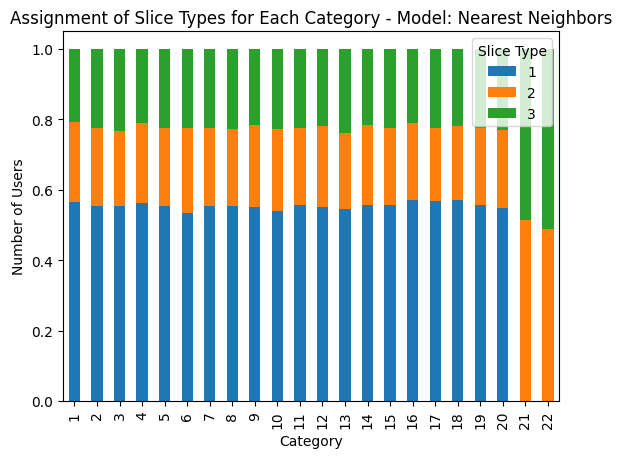

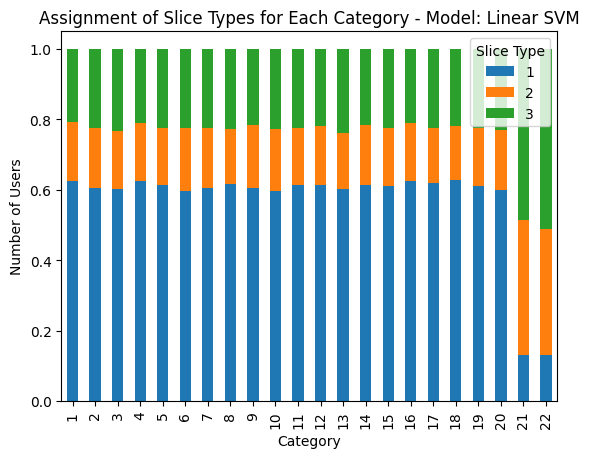

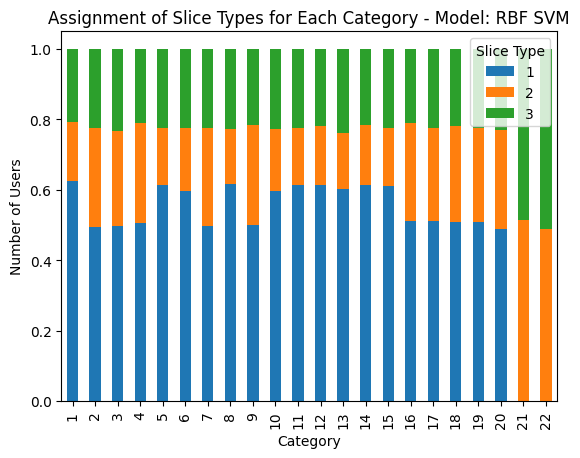

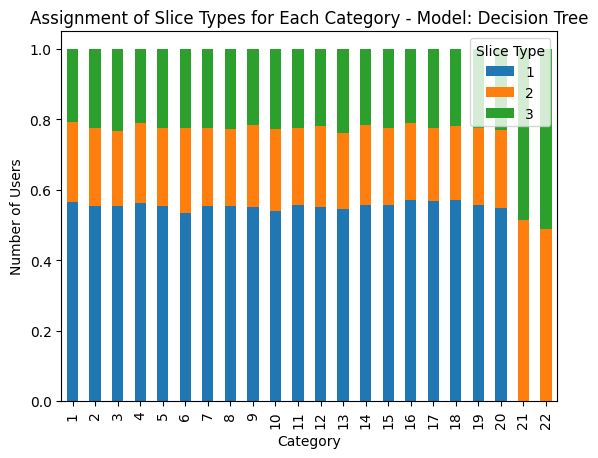

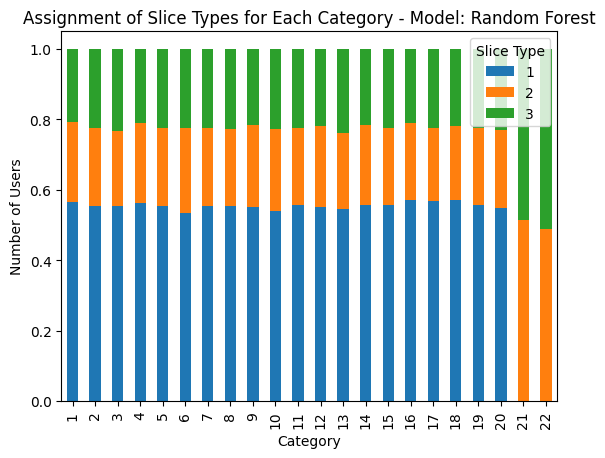

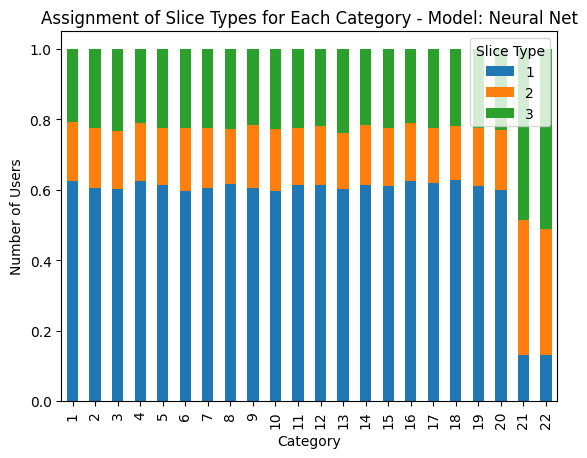

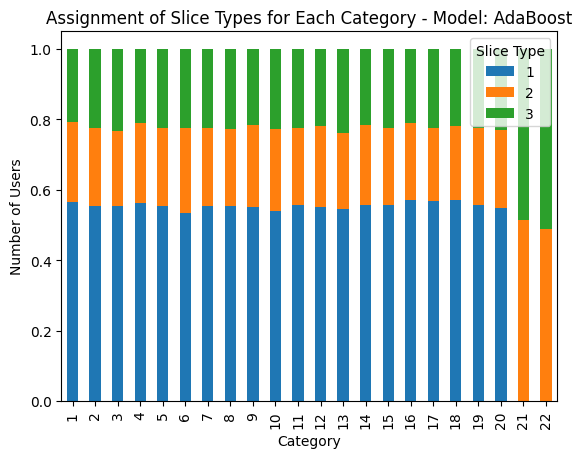

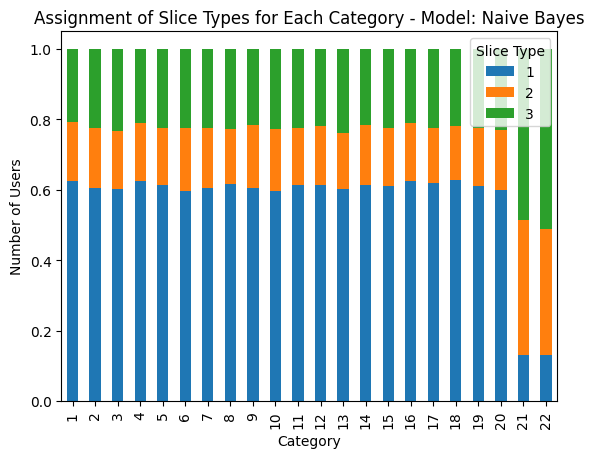

In [81]:
for model_name, results in predicted_results.items():
    X = X_test
    X['sliceType'] = results
    
    prob_cat_test = X.groupby('LTE5gCategory')['sliceType'].value_counts(normalize=True).unstack()

    # Plotting
    prob_cat_test.plot(kind='bar', stacked=True)
    plt.xlabel('Category')
    plt.ylabel('Number of Users')
    plt.title(f'Assignment of Slice Types for Each Category - Model: {model_name}')
    plt.legend(title='Slice Type')
    plt.show()

Model: Nearest Neighbors

Difference from Training Data:
For Categories 1 through 20:
sliceType
1   -0.0
2    0.0
3    0.0
dtype: float64 2

For Categories 21 and 22:
sliceType
1     NaN
2    0.55
3   -0.55
dtype: float64




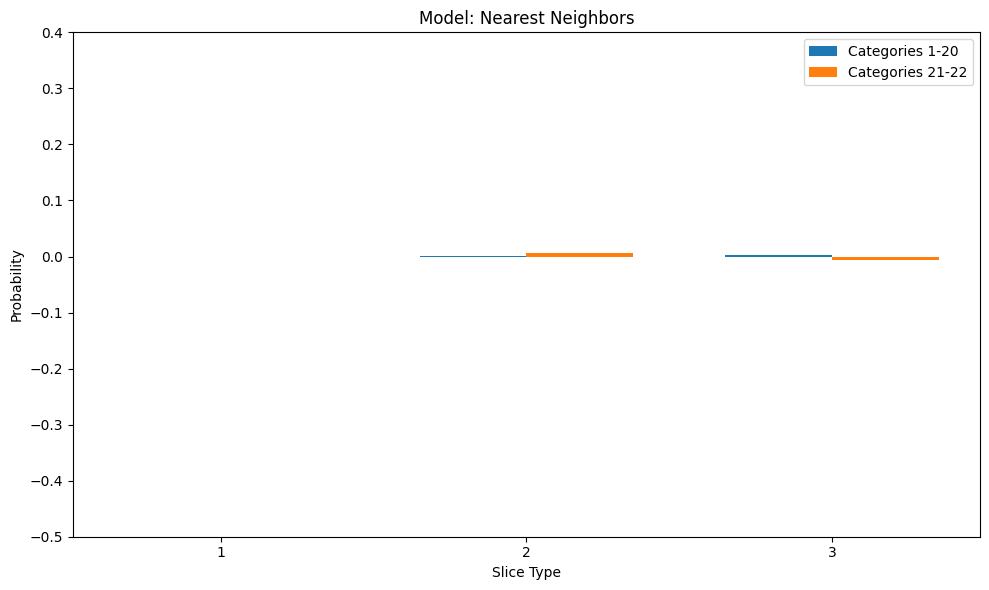

Model: Linear SVM

Difference from Training Data:
For Categories 1 through 20:
sliceType
1    10.0
2   -25.0
3     0.0
dtype: float64 2

For Categories 21 and 22:
sliceType
1      inf
2   -25.54
3    -0.55
dtype: float64




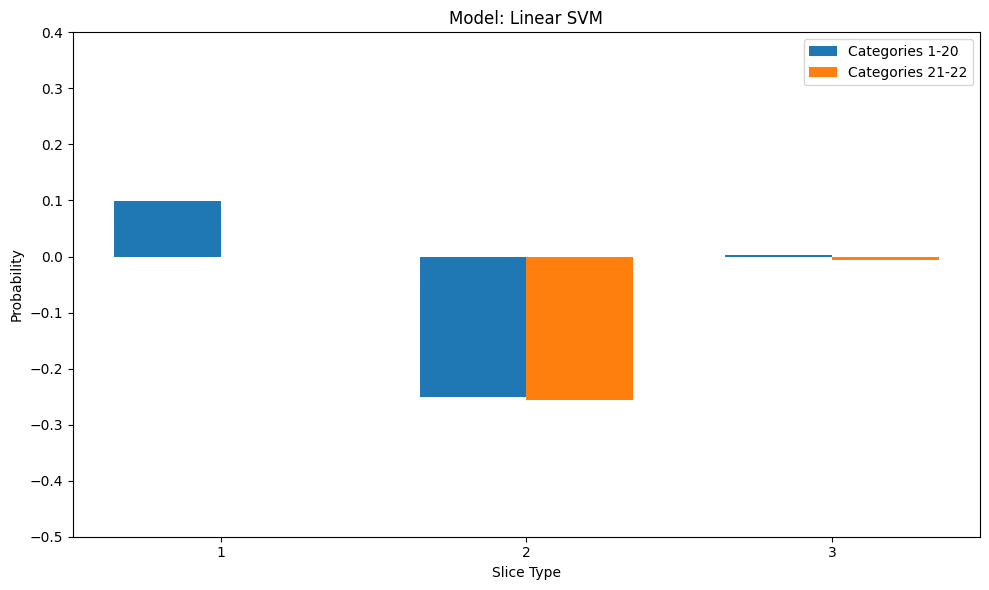

Model: RBF SVM

Difference from Training Data:
For Categories 1 through 20:
sliceType
1    0.0
2   -0.0
3    0.0
dtype: float64 2

For Categories 21 and 22:
sliceType
1     NaN
2    0.55
3   -0.55
dtype: float64




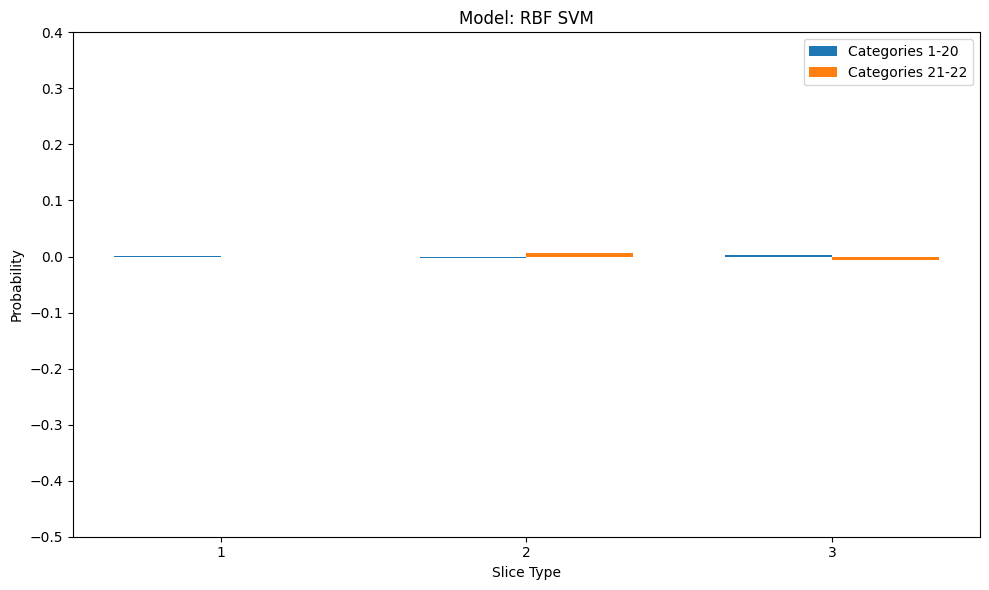

Model: Decision Tree

Difference from Training Data:
For Categories 1 through 20:
sliceType
1   -0.0
2    0.0
3    0.0
dtype: float64 2

For Categories 21 and 22:
sliceType
1     NaN
2    0.55
3   -0.55
dtype: float64




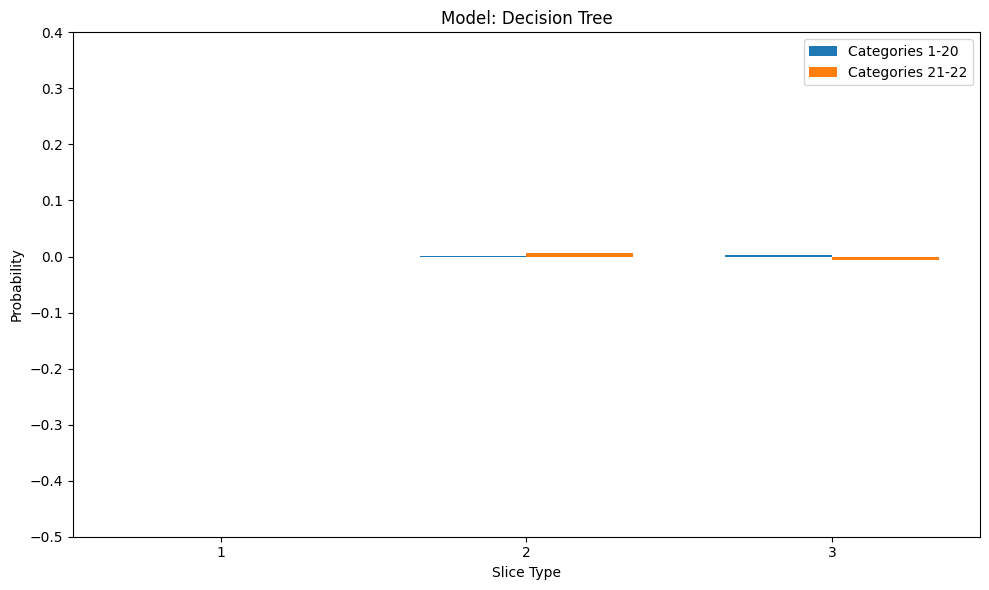

Model: Random Forest

Difference from Training Data:
For Categories 1 through 20:
sliceType
1   -0.0
2    0.0
3    0.0
dtype: float64 2

For Categories 21 and 22:
sliceType
1     NaN
2    0.55
3   -0.55
dtype: float64




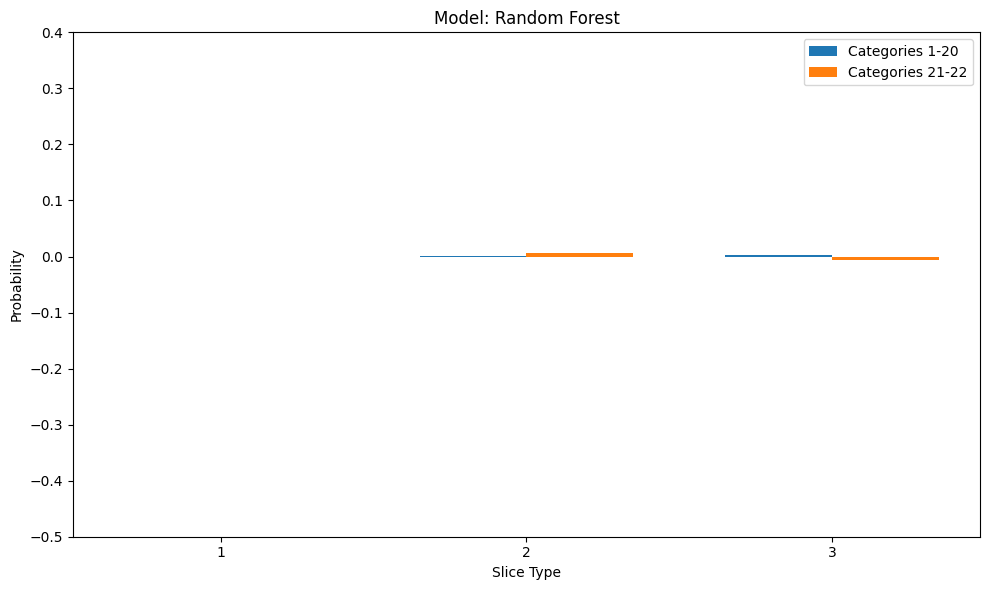

Model: Neural Net

Difference from Training Data:
For Categories 1 through 20:
sliceType
1    10.0
2   -25.0
3     0.0
dtype: float64 2

For Categories 21 and 22:
sliceType
1      inf
2   -25.54
3    -0.55
dtype: float64




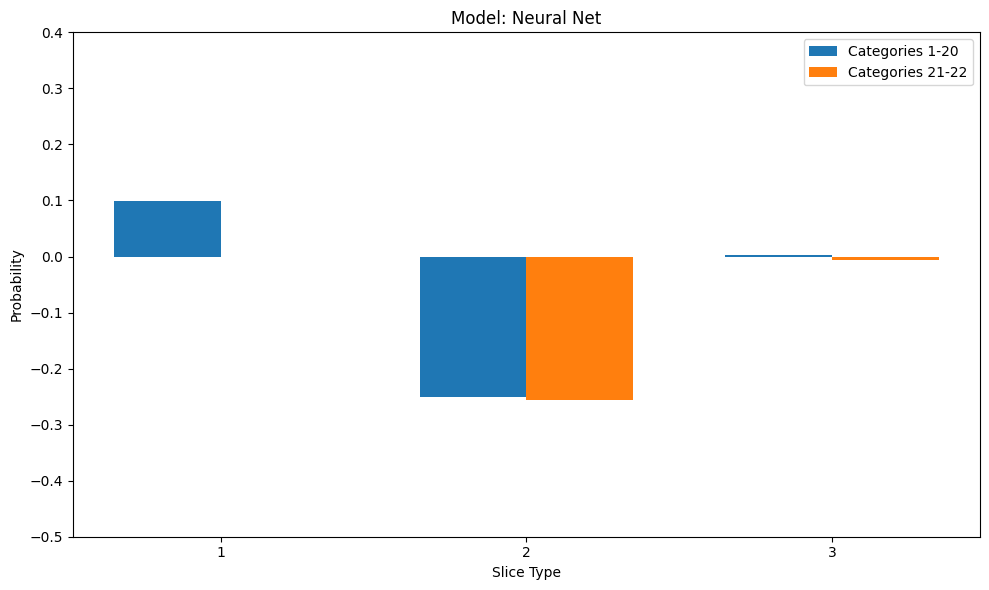

Model: AdaBoost

Difference from Training Data:
For Categories 1 through 20:
sliceType
1   -0.0
2    0.0
3    0.0
dtype: float64 2

For Categories 21 and 22:
sliceType
1     NaN
2    0.55
3   -0.55
dtype: float64




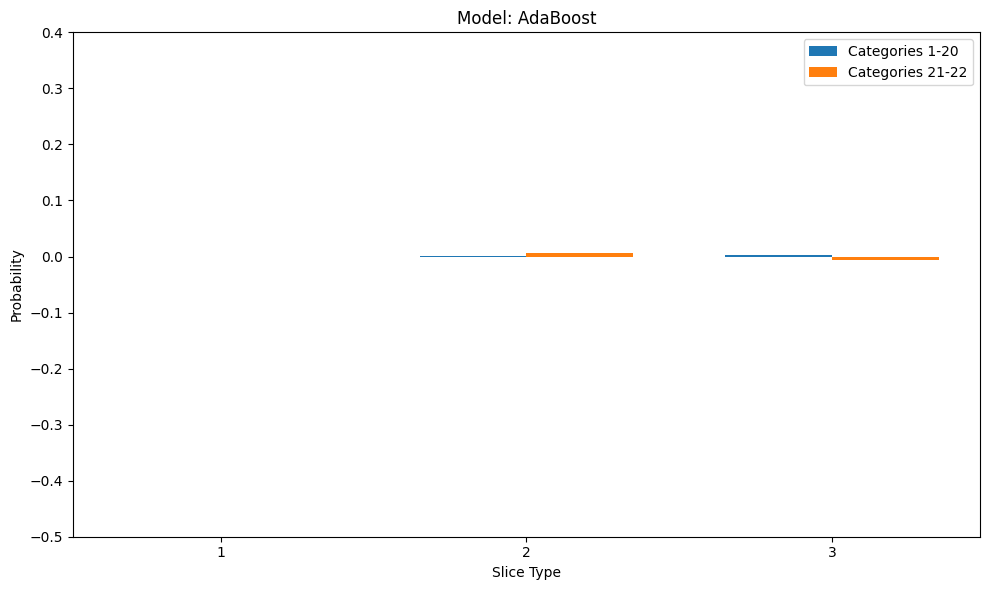

Model: Naive Bayes

Difference from Training Data:
For Categories 1 through 20:
sliceType
1    10.0
2   -25.0
3     0.0
dtype: float64 2

For Categories 21 and 22:
sliceType
1      inf
2   -25.54
3    -0.55
dtype: float64




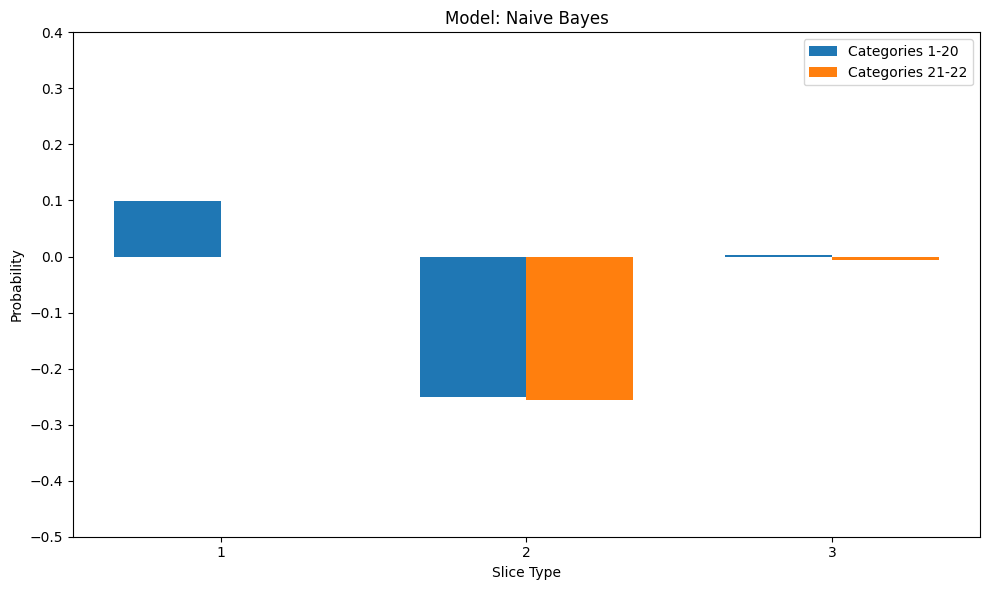

In [72]:
# Separate categories into two groups: 1-20 and 21-22
train_1_to_20 = count_cat.loc[1:20].mean().fillna(0)
train_1_to_20 = train_1_to_20 / sum(train_1_to_20)
train_21_to_22 = count_cat.loc[21:22].mean().fillna(0)
train_21_to_22 = train_21_to_22 / sum(train_21_to_22)

# Initialize a dictionary to store absolute sum of errors for each model
absolute_errors = {}

# Iterate through each model and compare statistics
for model_name, results in predicted_results.items():
    X = X_test
    X['sliceType'] = results
    
    prob_cat_test = X.groupby('LTE5gCategory')['sliceType'].value_counts(normalize=True).unstack()

    # Calculate average probabilities for each group
    test_1_to_20 = prob_cat_test.loc[1:20].mean().fillna(0)
    test_1_to_20 = test_1_to_20 / sum(test_1_to_20)
    test_21_to_22 = prob_cat_test.loc[21:22].mean().fillna(0)
    test_21_to_22 = test_21_to_22 / sum(test_21_to_22)

    # Calculate absolute sum of errors for each model
    abs_error_1_to_20 = np.sum(np.abs(test_1_to_20 - train_1_to_20))
    abs_error_21_to_22 = np.sum(np.abs(test_21_to_22 - train_21_to_22))
    absolute_errors[model_name] = abs_error_1_to_20 + abs_error_21_to_22

    # Print comparison
    print(f"Model: {model_name}")
    
    print("\nDifference from Training Data:")
    print("For Categories 1 through 20:")
    error_1_to_20 = ((test_1_to_20 - train_1_to_20)/train_1_to_20)
    print(round(error_1_to_20*100),2)
    print("\nFor Categories 21 and 22:")
    error_21_to_22 = ((test_21_to_22 - train_21_to_22)/train_21_to_22)
    print(round(error_21_to_22*100,2))
    print("\n")

    # Plot comparison
    fig, axes = plt.subplots(figsize=(10, 6))
    bar_width = 0.35
    index = np.arange(len(test_1_to_20))

    # Plot for Categories 1 through 20
    plt.bar(index, error_1_to_20, bar_width, label='Categories 1-20')
    plt.bar(index + bar_width, error_21_to_22, bar_width, label='Categories 21-22')

    plt.xlabel('Slice Type')
    plt.ylabel('Probability')
    plt.title(f"Model: {model_name}")
    plt.xticks(index + bar_width / 2, error_1_to_20.index)
    plt.yticks(np.arange(-0.5, 0.5, 0.1))
    plt.legend()

    plt.tight_layout()
    plt.show()


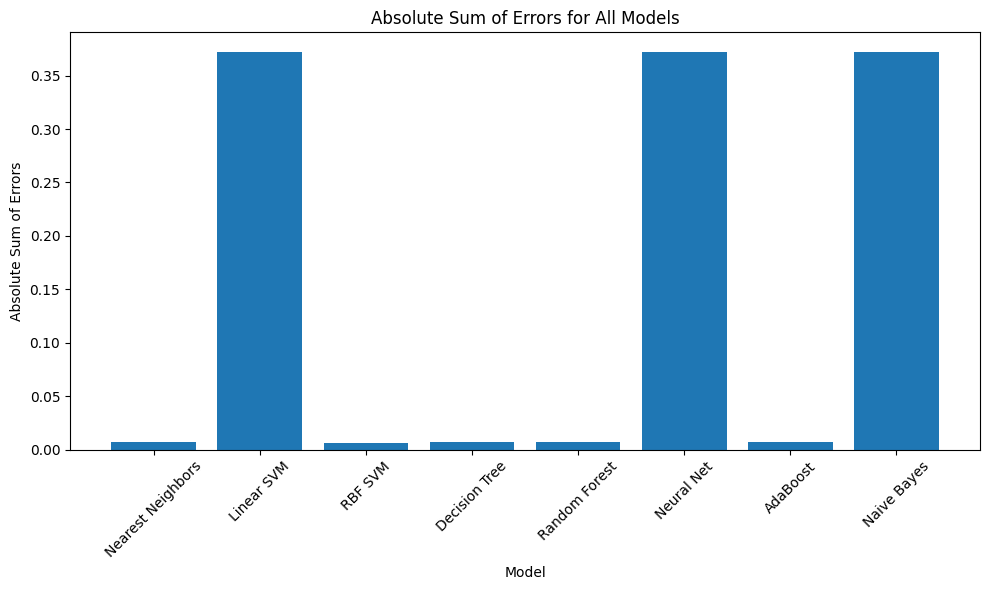

In [73]:
# Plot the absolute sum of errors for all models
plt.figure(figsize=(10, 6))
plt.bar(absolute_errors.keys(), absolute_errors.values())
plt.xlabel('Model')
plt.ylabel('Absolute Sum of Errors')
plt.title('Absolute Sum of Errors for All Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Discussion
Overall, this was a fairly easy dataset to make predictions on.

I can make the following observations based on the results from the thinned dataset. 

1. **Non-linearity** - NN, RBF SVM, decision trees, random forests, and AdaBoost are all capable of capturing non-linear relationships. When we removed features, this made the data non-linear. Naive Bayes, linear SVM, and neural networks often assume linear relationships between features and target variables. Poor performance of these algorithms suggests that your data may not adhere well to these linear assumptions.
2. **Ensemble Methods** - Random forests and AdaBoost are ensemble methods that combine multiple models to improve performance. Their success on your data suggests that there may be benefit in combining multiple weaker models to capture the underlying patterns in your dataset.
